In [ ]:
# "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
df = pd.read_csv(url,names=['sepal length',"sepal width","petal length","petal width","target"])

In [ ]:
df.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df['target'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
features = ['sepal length',"sepal width","petal length","petal width"]
x = df.loc[:,features].values

In [ ]:
y = df.loc[:,["target"]].values

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
pd.DataFrame(data=x,columns=features).head(5)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
pca = PCA(n_components=2)
principle_components = pca.fit_transform(x)

In [ ]:
principleDF = pd.DataFrame(data=principle_components,
                          columns=['PC1',"PC2"]).reset_index(drop=True)

In [ ]:
principleDF.head(4)

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368


In [ ]:
df[['target']].tail(5)

,target
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica
149,Iris-virginica


In [ ]:
finalDF = pd.concat([principleDF,df[['target']]],axis=1)
finalDF.tail(5)

,PC1,PC2,target
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica
149,0.959299,-0.022284,Iris-virginica


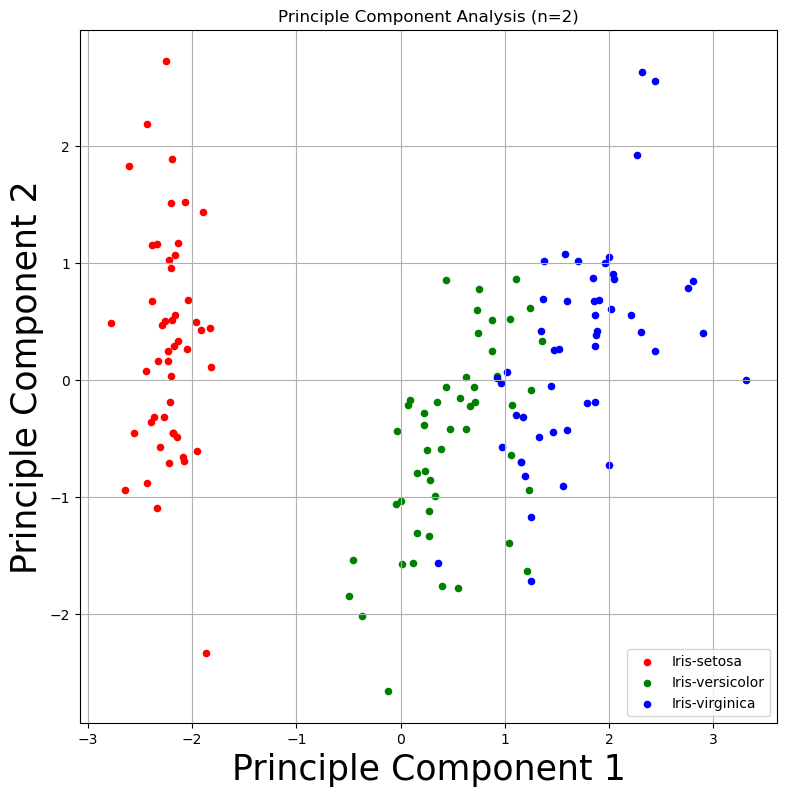

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principle Component 1',fontsize=25)
ax.set_ylabel("Principle Component 2",fontsize=25)
ax.set_title("Principle Component Analysis (n=2)")

targets = ['Iris-setosa','Iris-versicolor',"Iris-virginica"]
colors = ['r','g','b']

list(zip(targets,colors))

for target,color in zip(targets,colors):
    idk = finalDF['target'] == target
    ax.scatter(finalDF.loc[idk,'PC1'],
              finalDF.loc[idk,'PC2'],
              c = color,
              s=20)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
pc1 = 0.72 (variance)
pc2 = 0.23 (VariaNCE)

72 + 23

95

In [ ]:
# features = ['sepal length',"sepal width","petal length","petal width"]
# x = df.loc[:,features].values

In [ ]:
y = df.loc[:,["target"]].values

In [ ]:
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target'])
y = df['target_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principleDF,y,test_size=0.20)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
cr = classification_report(lr_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
cr_dt = classification_report(dt_pred,y_test)
print(cr_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.64      0.88      0.74         8
           2       0.88      0.64      0.74        11

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.82        30
weighted avg       0.86      0.83      0.83        30

